In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.model_selection import train_test_split

## 1.- Análisis y exploración

In [2]:
df = pd.read_csv('../datasets/combined_data.csv')

dataset sacado de: https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification

In [3]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

<Axes: xlabel='label'>

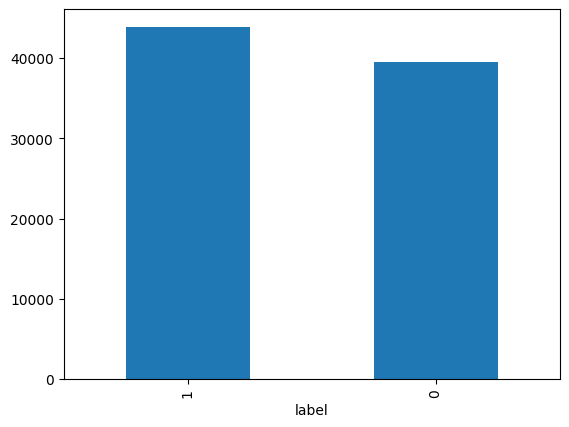

In [6]:
df['label'].value_counts().plot(kind='bar')

## 2.- Preprocesamiento

In [7]:
# Definir función de preprocesamiento de texto
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminación de stopwords y signos de puntuación
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if (word.lower() not in stop_words) and (word.lower() not in string.punctuation)]
    
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Convertir la lista de tokens a una cadena nuevamente
    clean_text = ' '.join(tokens)
    
    return clean_text

In [ ]:
# Aplicar la función de preprocesamiento de texto a la columna 'text'
df['clean_text'] = df['text'].apply(preprocess_text)

In [ ]:
# Convertir texto en un formato numérico adecuado utilizando CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
x = vectorizer.fit_transform(df['clean_text'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, df['label'], test_size=0.2, random_state=42)